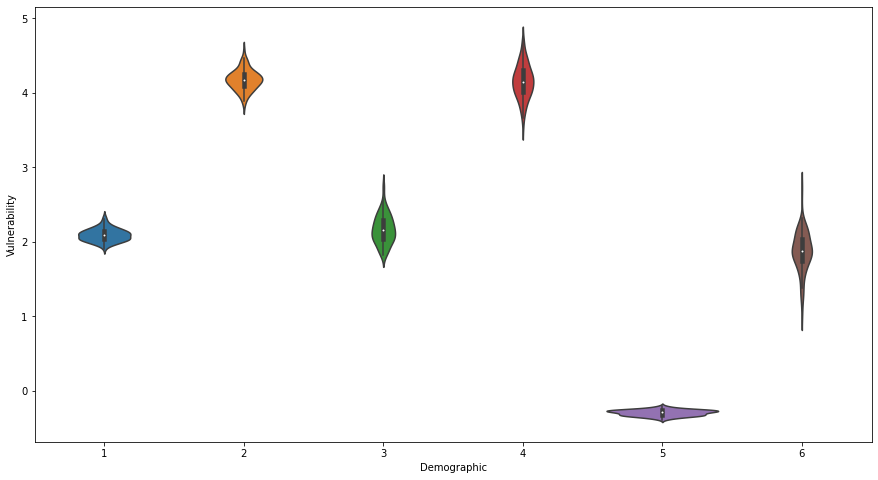

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from itertools import count
%matplotlib inline

num_bandits = 6
mean_rewards = np.array([2.11,4.16,2.16,4.14,-0.29,1.85])
dist_sd = np.array([0.09,0.16,0.2,0.24,0.04,0.27])

#KEY
#1 - Urban
#2 - SC
#3 - ST
#4 - Smoking
#5 - Ill-health
#6 - Migrant


def get_reward(bandit,  mean_rewards, t=None):
    if bandit >=0 and bandit <=num_bandits:
        return np.random.normal(loc=mean_rewards[bandit], scale=dist_sd[bandit])
    else:
        raise ValueError('bandit >=0 and <{}'.format(num_bandits))

reward_dist_sample_size = 100
possible_rewards = []
for a in range(num_bandits):
    possible_rewards += [(get_reward(a, mean_rewards),a) for _ in range(reward_dist_sample_size)]

sample_rewards = pd.DataFrame(possible_rewards, columns = ['Vulnerability', 'Demographic'])
                              
plt.figure(figsize=(15,8))
ax = sns.violinplot(x=sample_rewards["Demographic"]+1, y=sample_rewards["Vulnerability"])

In [ ]:
class stat_env:
    
    def __init__(self, num_bandits=6, max_time_steps=1000):
        
        self.num_bandits = num_bandits
        self.T = max_time_steps
        mean_rewards = np.array([2.11,4.16,2.16,4.14,-0.29,1.85])
        dist_sd = np.array([0.09,0.16,0.2,0.24,0.04,0.27])

    def reset(self):
        
        self.mean_rewards = np.array([2.11,4.16,2.16,4.14,-0.29,1.85])
        
    def get_reward(self, bandit, t=None):
        
        if bandit >=0 and bandit <=self.num_bandits:
            
            return np.random.normal(loc=self.mean_rewards[bandit], scale=dist_sd[bandit])
        
        else:
            
            raise ValueError('argument bandit must be integer >=0 and <={}'.format(self.num_bandits))
            

def eps_greedy(environment, eps = 0.01, gamma=0.0):
    
    N = np.zeros(environment.num_bandits, dtype=np.int32)
    reward_estimates_q = np.zeros(environment.num_bandits)
    reward_history = np.zeros(environment.T)
    
    for itrn in range(environment.T):
        
        bandit_chosen = np.random.randint(environment.num_bandits)
        
        if np.random.uniform() > eps:
            
            bandit_chosen = np.argmax(reward_estimates_q)
            
        reward = environment.get_reward(bandit_chosen, itrn)        
        N[bandit_chosen] +=1
        stepsize = 1/N[bandit_chosen]
        
        if gamma != 0:
            
            stepsize = gamma
            
        reward_estimates_q[bandit_chosen] = reward_estimates_q[bandit_chosen] + \
                                    stepsize * (reward - reward_estimates_q[bandit_chosen]) 
            
        reward_history[itrn] = reward
        
    return reward_history    

Iteration No.0 , Epsilon = 0
Iteration No.500 , Epsilon = 0
Iteration No.1000 , Epsilon = 0
Iteration No.1500 , Epsilon = 0
Iteration No.0 , Epsilon = 0.01
Iteration No.500 , Epsilon = 0.01
Iteration No.1000 , Epsilon = 0.01
Iteration No.1500 , Epsilon = 0.01
Iteration No.0 , Epsilon = 0.1
Iteration No.500 , Epsilon = 0.1
Iteration No.1000 , Epsilon = 0.1
Iteration No.1500 , Epsilon = 0.1
Iteration No.0 , Epsilon = 0.15
Iteration No.500 , Epsilon = 0.15
Iteration No.1000 , Epsilon = 0.15
Iteration No.1500 , Epsilon = 0.15
Iteration No.0 , Epsilon = 0.2
Iteration No.500 , Epsilon = 0.2
Iteration No.1000 , Epsilon = 0.2
Iteration No.1500 , Epsilon = 0.2
Iteration No.0 , Epsilon = 0.4
Iteration No.500 , Epsilon = 0.4
Iteration No.1000 , Epsilon = 0.4
Iteration No.1500 , Epsilon = 0.4
Iteration No.0 , Epsilon = 0.5
Iteration No.500 , Epsilon = 0.5
Iteration No.1000 , Epsilon = 0.5
Iteration No.1500 , Epsilon = 0.5
Iteration No.0 , Epsilon = 0.6
Iteration No.500 , Epsilon = 0.6
Iteration No

Text(0, 0.5, 'Average reward')

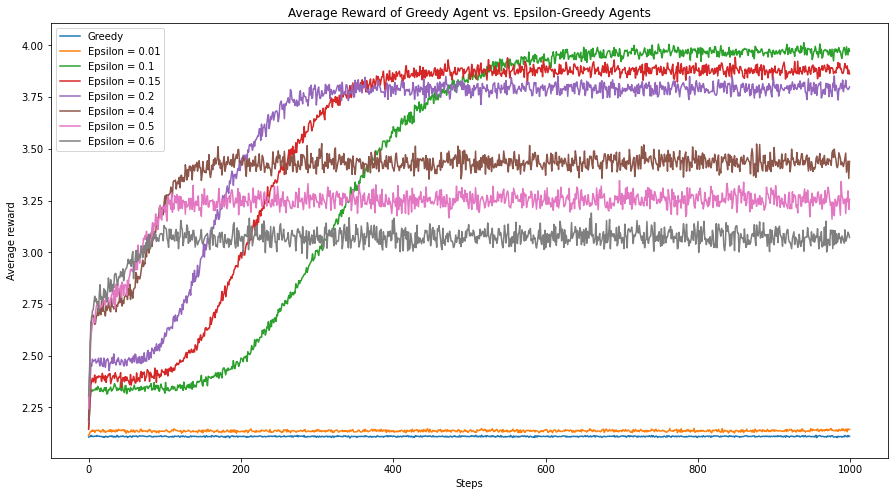

In [ ]:
env = stat_env()

num_iterations = 1000
num_experiments = 2000
reward_averages_by_eps = []

for eps in [0, 0.01, 0.1, 0.15, 0.2, 0.4, 0.5, 0.6]:
    reward_histories = np.zeros(num_iterations)    
    for exp_number in range(num_experiments):
      
        env.reset()
        if exp_number%500==0:
            print('Iteration No.{} , Epsilon = {}'.format(exp_number,eps))
        history = eps_greedy(env, eps, gamma=0.1)
        reward_histories = np.add(history,reward_histories )
    reward_averages_by_eps.append(reward_histories/num_experiments)
    
plt.figure(figsize=(15,8))
for i, eps in enumerate([0, 0.01, 0.1, 0.15, 0.2, 0.4, 0.5, 0.6]):
    plt.plot(reward_averages_by_eps[i], label=str(eps))
plt.title("Average Reward of Greedy Agent vs. Epsilon-Greedy Agents")
plt.legend(("Greedy", "Epsilon = 0.01", "Epsilon = 0.1", "Epsilon = 0.15", "Epsilon = 0.2", "Epsilon = 0.4", "Epsilon = 0.5", "Epsilon = 0.6"))
plt.xlabel("Steps")
plt.ylabel("Average reward")

In [ ]:
def ucb(environment, eps = 0.01, gamma=0.0):
    
    N = np.zeros(environment.num_bandits, dtype=np.int32)
    ucb_reward_estimates_q = np.zeros(environment.num_bandits)
    ucb_reward_history = np.zeros(environment.T)
    ucb_c = 0.6
    
    for itrn in range(environment.T):
        
        bandit_chosen = np.random.randint(environment.num_bandits)
        
        if np.random.uniform() > eps:
            
            variance = np.array([np.sqrt(np.log(itrn+1)/(N[b]+0.0000001)) for b in range(environment.num_bandits)])
                
            bandit_chosen = np.argmax(ucb_reward_estimates_q+ ucb_c*variance)
            
            
        ucb_reward = environment.get_reward(bandit_chosen, itrn)        
        N[bandit_chosen] +=1
        stepsize = 1/N[bandit_chosen]
        
        if gamma != 0:
            
            stepsize = gamma
        
        ucb_reward_estimates_q[bandit_chosen] = ucb_reward_estimates_q[bandit_chosen] + \
                                    stepsize * (ucb_reward - ucb_reward_estimates_q[bandit_chosen]) 
            
        ucb_reward_history[itrn] = ucb_reward
        
    return ucb_reward_history

Iteration No.0
Iteration No.500
Iteration No.1000
Iteration No.1500


Text(0, 0.5, 'Average reward')

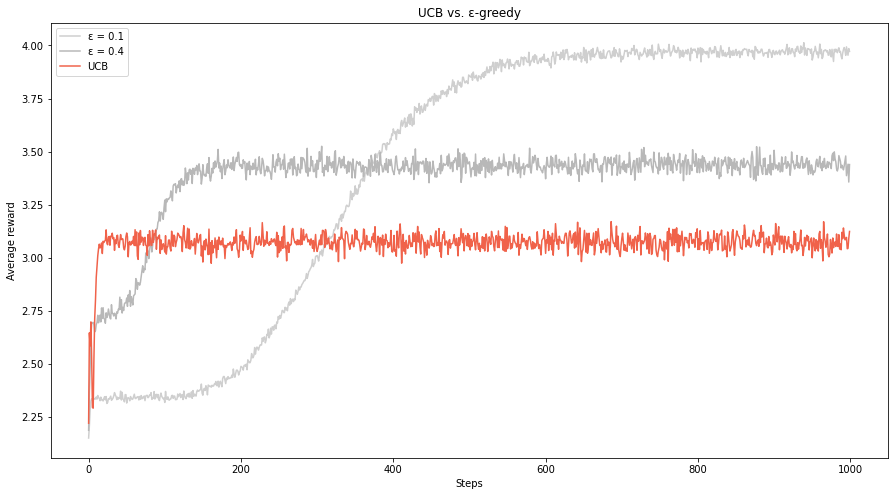

In [ ]:
env = stat_env()

num_iterations = 1000
num_experiments = 2000
ucb_reward_averages = []

ucb_reward_histories = np.zeros(num_iterations) 

for exp_number in range(num_experiments):
      
    env.reset()
    
    if exp_number%500==0:
        print('Iteration No.{}'.format(exp_number)) 
        
    ucb_history = ucb(env, eps, gamma=0.1)
    
    ucb_reward_histories = np.add(ucb_history,ucb_reward_histories)
    
ucb_reward_averages.append(ucb_reward_histories/num_experiments)
    
plt.figure(figsize=(15,8))
plt.plot(reward_averages_by_eps[2], color = '#cfcfcf')
plt.plot(reward_averages_by_eps[5], color = '#b8b8b8')
plt.plot(ucb_reward_averages[0], color = '#f0624a')

plt.title("UCB vs. ε-greedy")
plt.legend(("ε = 0.1", "ε = 0.4", "UCB"))
plt.xlabel("Steps")
plt.ylabel("Average reward")

In [ ]:
#non-stationary environment
mean_rewards = np.array([2.11,4.16,2.16,4.14,-0.29,1.85])
ns_mean_rewards = mean_rewards

times_chosen = np.zeros(6)

def ns_eps_greedy(environment, eps = 0.01, gamma=0.0):

    global times_chosen
    N = np.zeros(environment.num_bandits, dtype=np.int32)
    reward_estimates_q = np.zeros(environment.num_bandits)
    reward_history = np.zeros(environment.T)
    
    for itrn in range(environment.T):
        bandit_chosen = np.random.randint(environment.num_bandits)

        if np.random.uniform() > eps:
            bandit_chosen = np.argmax(reward_estimates_q)
            
        reward = environment.get_reward(bandit_chosen, itrn)        
        N[bandit_chosen] +=1
        stepsize = 1/N[bandit_chosen]
        times_chosen[bandit_chosen] = times_chosen[bandit_chosen]+1
        
        if gamma != 0:
            stepsize = gamma
            
        reward_estimates_q[bandit_chosen] = reward_estimates_q[bandit_chosen] + \
                                    stepsize * (reward - reward_estimates_q[bandit_chosen]) 
            
        reward_history[itrn] = reward 
    return reward_history 

class ns_env:
    
    def __init__(self, envtype = 'ns', num_bandits = 6, max_time_steps=1000, num_change_points=None):

        self.env_type = envtype
        self.num_bandits = num_bandits
        self.T = max_time_steps
        self.change_point_indx = 0
        self.bandits = num_bandits 
               
        if num_change_points is None:
            self.num_change_points = int(np.log(self.T))
        else:
            self.num_change_points = num_change_points
        
        self.change_points = np.sort(np.random.randint(low=0, high=self.T-1,size=self.num_change_points))
        self.minimum = 7
        self.mean_rewards = self.give_ns_means()
        
        
    def give_ns_means(self):

        rewards = []

        if self.bandits > self.minimum:
            for _ in range(self.num_change_points+1):
                temp_normal = np.zeros(6)
                for i in range(6):
                    max_i = np.argmax(times_chosen)
                    if i == max_i:
                        temp_normal[i] = ns_mean_rewards[i]
                    else:
                        ns_mean_rewards[i] = ns_mean_rewards[i] + np.random.uniform(0, 1)
                        temp_normal[i] = ns_mean_rewards[i]

            rewards.append(temp_normal)
          
        else:
            return [np.random.normal(size=self.num_bandits) for _ in range(self.num_change_points+1)]
        
        return rewards         
        
    def reset(self):
        ns_mean_rewards = mean_rewards
        self.change_point_indx = 0
        self.mean_rewards = self.give_ns_means()
        
    def get_reward(self, bandit, t):        
        if bandit >=0 and bandit <=self.num_bandits:
            if self.change_point_indx < self.num_change_points and t > self.change_points[self.change_point_indx]:
                self.change_point_indx+=1            

            return np.random.normal(loc=self.mean_rewards[self.change_point_indx-1][bandit], scale=dist_sd[bandit])
        else:
            raise ValueError('Invalid bandit value')
      
            
non_stationary_env = ns_env(envtype='ns')

num_experiments = 2000
reward_averages_by_eps = []

for eps in [0.1, 0.2, 0.4]:
    times_chosen = np.zeros(6)
    reward_histories = np.zeros(non_stationary_env.T)
    for exp_number in range(num_experiments):
        non_stationary_env.reset()
        if exp_number%500 == 0:
            print('Iteration No.{} , ε = {}'.format(exp_number,eps))
        history = ns_eps_greedy(non_stationary_env, eps=eps, gamma=0.1)
        reward_histories = np.add(history, reward_histories )
    reward_averages_by_eps.append(reward_histories/num_experiments)

Iteration No.0 , ε = 0.1
Iteration No.500 , ε = 0.1
Iteration No.1000 , ε = 0.1
Iteration No.1500 , ε = 0.1
Iteration No.0 , ε = 0.2
Iteration No.500 , ε = 0.2
Iteration No.1000 , ε = 0.2
Iteration No.1500 , ε = 0.2
Iteration No.0 , ε = 0.4
Iteration No.500 , ε = 0.4
Iteration No.1000 , ε = 0.4
Iteration No.1500 , ε = 0.4


Text(0, 0.5, 'Average reward')

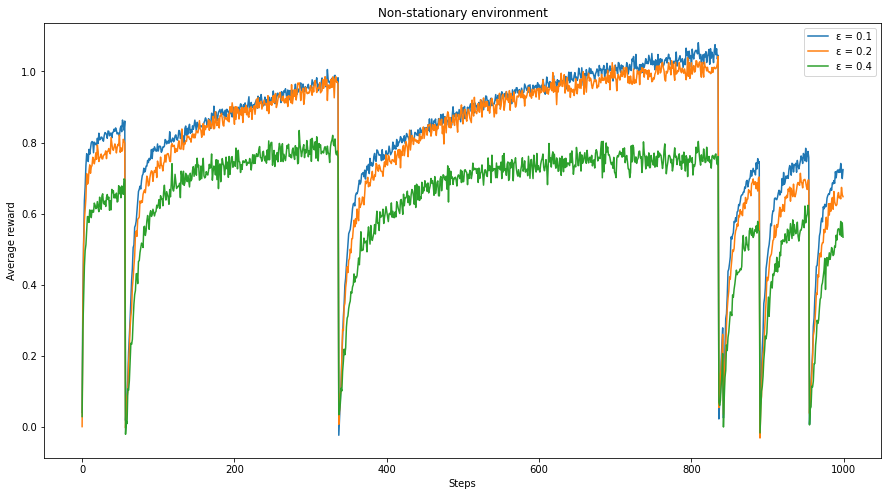

In [ ]:
plt.figure(figsize=(15,8))
for i, eps in enumerate([0.1, 0.2, 0.4]):
    plt.plot(reward_averages_by_eps[i], label=str(eps))
plt.title("Non-stationary environment")
plt.legend(("ε = 0.1", "ε = 0.2", "ε = 0.4"))
plt.xlabel("Steps")
plt.ylabel("Average reward")